In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Task 4: Descriptive Analysis

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


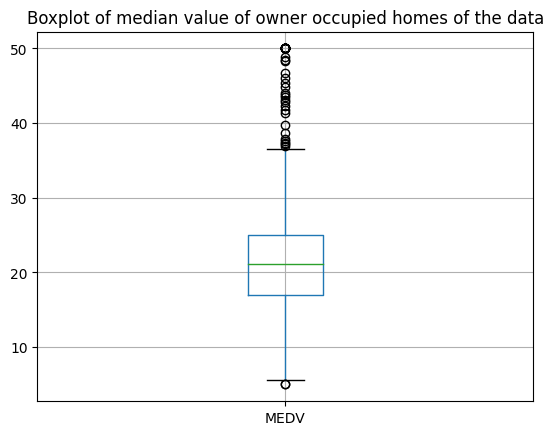

In [5]:
boston_df.boxplot('MEDV')
plt.title('Boxplot of median value of owner occupied homes of the data')
plt.show()

From the boxplot we see a median of about 21, with most outliers above the maximum

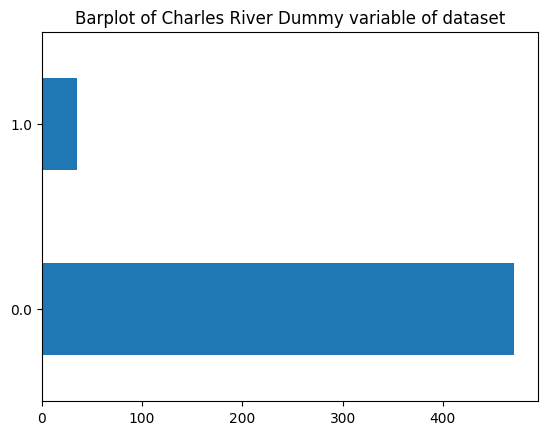

In [6]:
boston_df.CHAS.value_counts().plot.barh()
plt.title('Barplot of Charles River Dummy variable of dataset')
plt.show()

We can see that this categorical field has most values to be 0

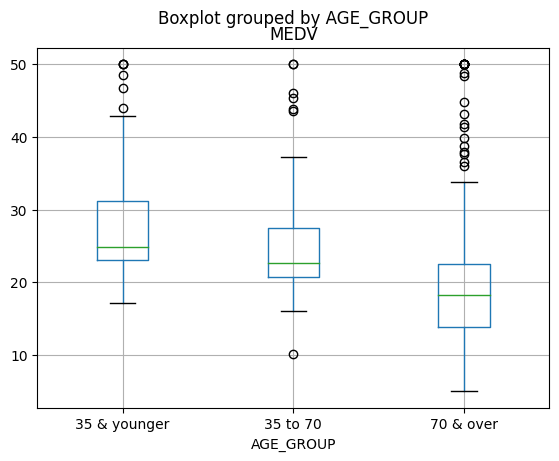

In [7]:
age_1 = '35 & younger'
age_2 = '35 to 70'
age_3 = '70 & over'
boston_df['AGE_GROUP'] = boston_df.AGE.apply(lambda x: age_1 if x<=35 else age_2 if x< 70 else age_3)
boston_df.boxplot('MEDV', by='AGE_GROUP')
plt.show()

viewing the boxplot by age groups show a decline in median of MEDV and an increase in outliers as age group increases

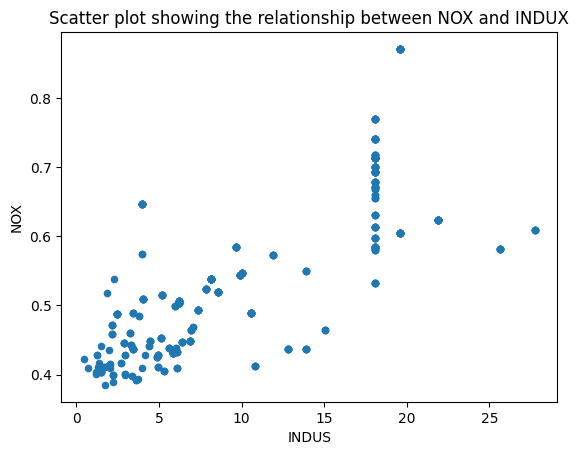

In [9]:
boston_df.plot.scatter('INDUS', 'NOX')
plt.title('Scatter plot showing the relationship between NOX and INDUX')
plt.show()

There seems to be some correlation between the two variables

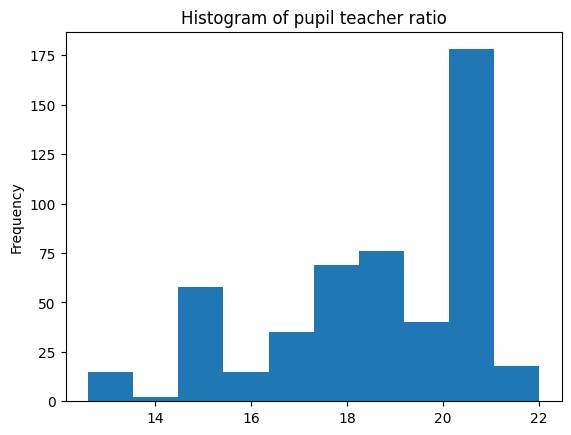

In [10]:
boston_df.PTRATIO.plot.hist()
plt.title('Histogram of pupil teacher ratio')
plt.show()

appears to have a skew to the right

# Task 5: Hypothesis Testing

## Is there a significant difference in MEDV for houses bounded by Charles River or not?
- null hypothesis: u1 = u2
- aplha = 0.05

In [11]:
stats.levene(boston_df.query('CHAS== 1').MEDV, boston_df.query('CHAS== 0').MEDV, center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

p-val < alpha, we can assume unequal variance

In [13]:
stats.ttest_ind(a = boston_df.query('CHAS== 1').MEDV,
                b = boston_df.query('CHAS== 0').MEDV,
                equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion**: p-val < alpha, hence we reject the null hypothesis as there is enough evidence that the means of the two groups differ

## Is there a difference in Median values of houses for each proportion of owner cooupied units build prior to 1940?
- null hypothesis: u1 = u2 = u3
- alpha = 0.05

In [15]:
stats.levene(
    boston_df.query(f"AGE_GROUP == '{age_1}'").MEDV,
    boston_df.query(f"AGE_GROUP == '{age_2}'").MEDV,
    boston_df.query(f"AGE_GROUP == '{age_3}'").MEDV,
    center='mean'
)

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

**hence** we can assume equal variance

In [16]:
stats.f_oneway(
    boston_df.query(f"AGE_GROUP == '{age_1}'").MEDV,
    boston_df.query(f"AGE_GROUP == '{age_2}'").MEDV,
    boston_df.query(f"AGE_GROUP == '{age_3}'").MEDV
)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion**: The p-val * 2 < alpha, hence we reject the null hypothesis as there is enough evidence that at lesr one group mean differs

## Can we conclude that there is no relationship between NOX and INDUS?
- null hypothesis: there is no correlation between NOX and INDUS
- alpha = 0.05

In [17]:
stats.pearsonr(boston_df.NOX, boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion**: p-val is less than alpha, we reject the null hypothesis and coclude that there is a relationship between NOX and INDUS

# What is the impact of an additional DIS on the MEDV?

In [18]:
X = sm.add_constant(boston_df.DIS)
y = boston_df.MEDV

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        09:18:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: An additional DIS will lead to an increase of 1.0916 in MEDV according to the regression model